In [1]:
#                                                          Mathematical Transformations
# Some algorithms expect data to be 'linear' i.e they perform better with sort of linear data 
# linear regression , SVM, KNN, NNs, even sometime decision trees etc
# log, reciprocal, power (square, sq. root), Box-cox, Yeo-Johnson transformation's target is to make data more to follow normal distribution

In [2]:
# Function Transformer class of scikit learn ---> log, reciprocal, sq, sq.root, custome transformer  

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats # QQ plot

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 

from sklearn.preprocessing import FunctionTransformer 
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('csv files/titanic.csv', usecols=['Survived', 'Fare', 'Age'])

In [5]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [6]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [7]:
df['Age'].fillna( df['Age'].mean(), inplace=True )
# handling missing values of Age column

In [8]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [9]:
X=df.iloc[:,1:3] # all rows and columns from 1 to 3 but not 3 
y = df.iloc[:,0] # all rows and 0th index column

In [10]:
X # input feature

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [11]:
y # target : survived(1) or not(0)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split ( X, y, test_size=.2, random_state=42 )

In [13]:
X_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


In [14]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [41]:
print(skew(X_train))
print(skew(y_train))

[0.35920709 4.86478905]
0.5102156617686798


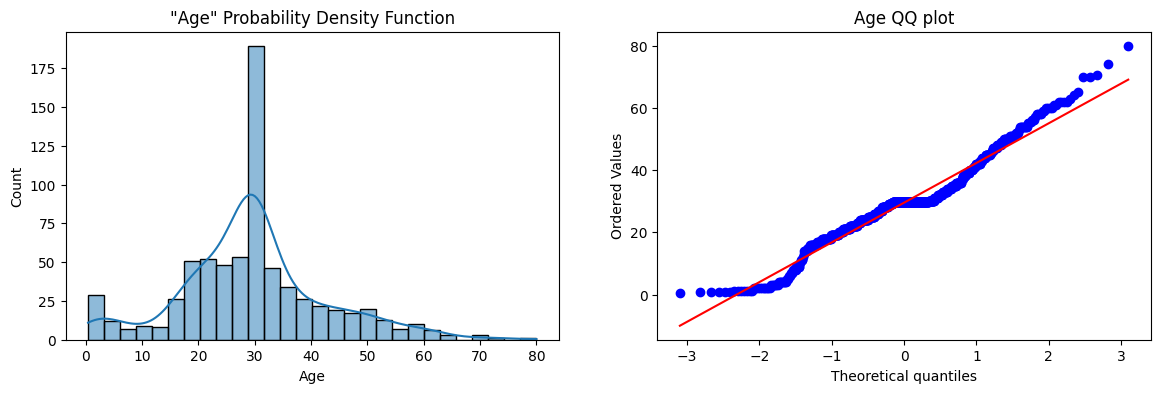

In [21]:
plt.figure(figsize=(14, 4)) # width * height in inch 
plt.subplot(121)            # create multiple plots in a single figure
sns.histplot(X_train['Age'], kde=True)
plt.title('"Age" Probability Density Function')
plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ plot')
plt.show()

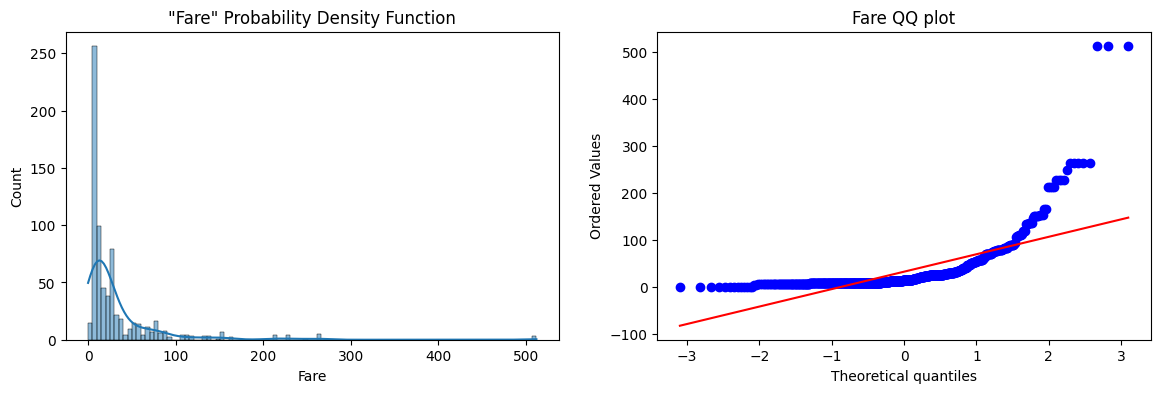

In [22]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.histplot(X_train['Fare'], kde=True)
plt.title('"Fare" Probability Density Function')
plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ plot')
plt.show()

In [42]:
# lets train a model and see accuracy with this data

In [43]:
lr = LogisticRegression ()
dt = DecisionTreeClassifier()

In [49]:
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
print(lr.coef_, lr.intercept_)
print(dt.tree_)

[[-0.0138331   0.01418295]] [-0.54303643]


In [50]:
y_pred1 = lr.predict(X_test)
y_pred2 = dt.predict(X_test)

In [51]:
print('Accuracy Logistic Regression :', accuracy_score(y_test, y_pred1))
print('Accuracy Decision Tree :', accuracy_score(y_test, y_pred2))

Accuracy Logistic Regression : 0.6480446927374302
Accuracy Decision Tree : 0.6703910614525139


In [54]:
# A] applying log transform
trf = FunctionTransformer ( func=np.log1p ) # log1p --> 1 plus and then apply log 

In [55]:
X_train_transformed = trf.fit_transform(X_train) # only transform also good as nothign here to learn 
X_test_transformed = trf.transform (X_test)

In [56]:
lrt=LogisticRegression()
dtt=DecisionTreeClassifier()

lrt.fit(X_train_transformed, y_train)
dtt.fit(X_train_transformed, y_train)

y_pred1_t = lrt.predict (X_test_transformed)
y_pred2_t = dtt.predict( X_test_transformed)

print('Accuracy Logistic Regression after log transform :', accuracy_score(y_test, y_pred1_t))
print('Accuracy Decision Tree after log transform :', accuracy_score(y_test, y_pred2_t))

Accuracy Logistic Regression after log transform : 0.6815642458100558
Accuracy Decision Tree after log transform : 0.6871508379888268


In [57]:
# 64% --> 68%

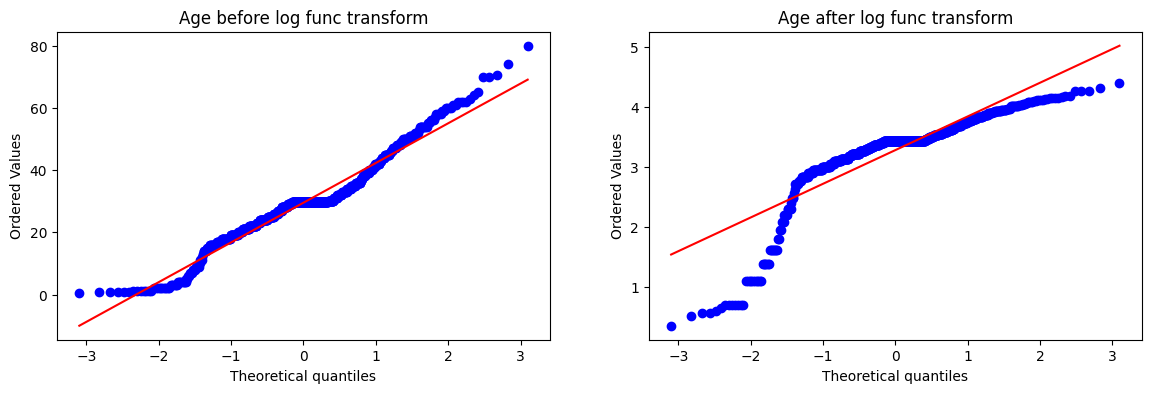

In [61]:
plt.figure(figsize=(14, 4))
plt.subplot(121)    
stats.probplot(X_train['Age'], dist='norm', plot=plt)           
plt.title('Age before log func transform')
plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist='norm', plot=plt) 
plt.title('Age after log func transform')
plt.show()

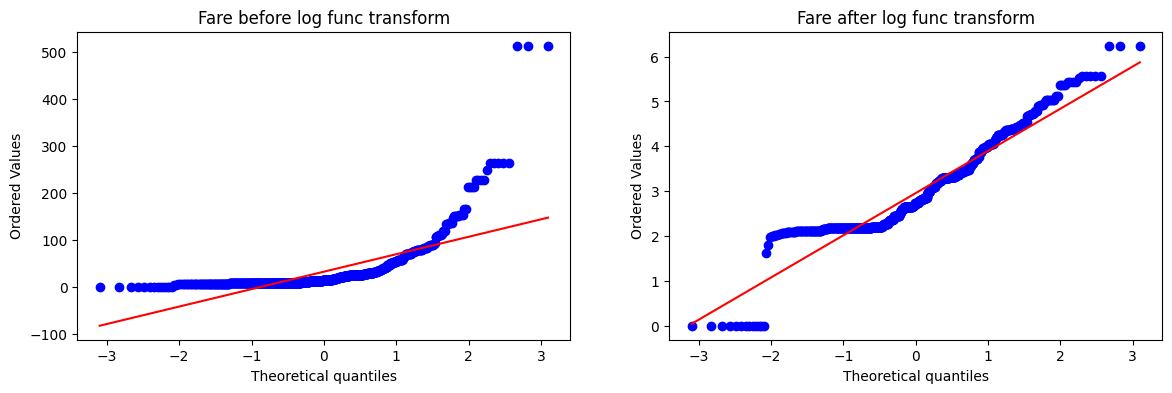

In [62]:
plt.figure(figsize=(14, 4))
plt.subplot(121)    
stats.probplot(X_train['Fare'], dist='norm', plot=plt)           
plt.title('Fare before log func transform')
plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist='norm', plot=plt) 
plt.title('Fare after log func transform')
plt.show()

In [63]:
# log function transformation shows better result but not age . So apply log func transformer to Fare column only 

In [68]:
#                                                                                 Custom Transformation 
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    lr = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(lr,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6589013732833957


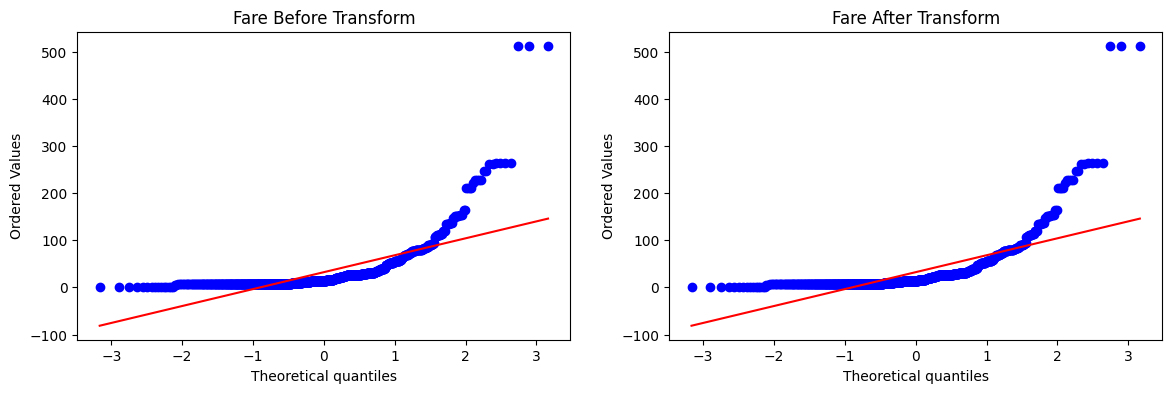

In [80]:
apply_transform(lambda x : x)

Accuracy 0.6431335830212235


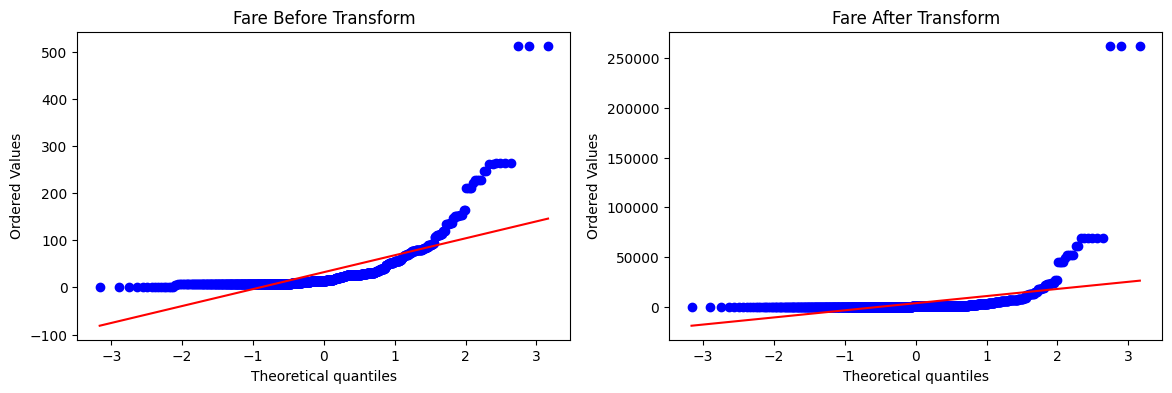

In [81]:
apply_transform(lambda x : x**2)

Accuracy 0.6611485642946316


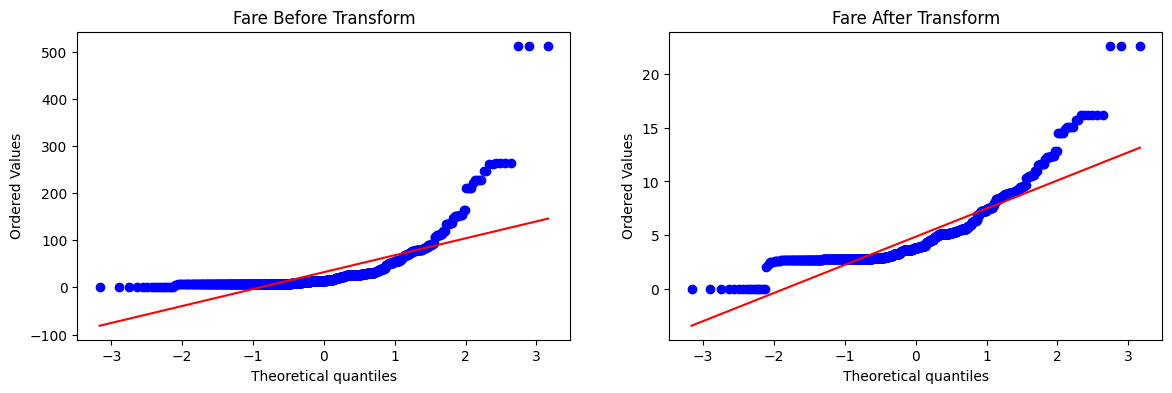

In [82]:
apply_transform(lambda x : x**.5)

Accuracy 0.6678901373283396


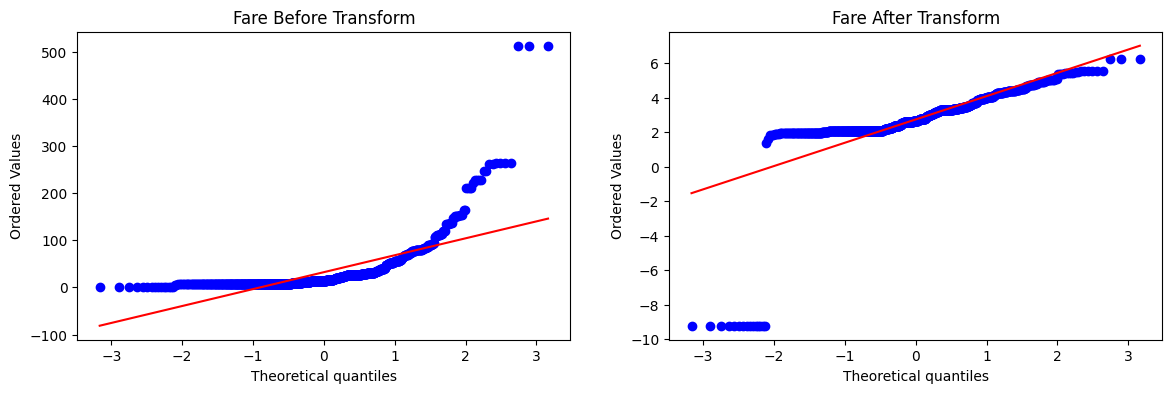

In [83]:
apply_transform(lambda x : np.log(x+0.0001))

Accuracy 0.6195131086142323


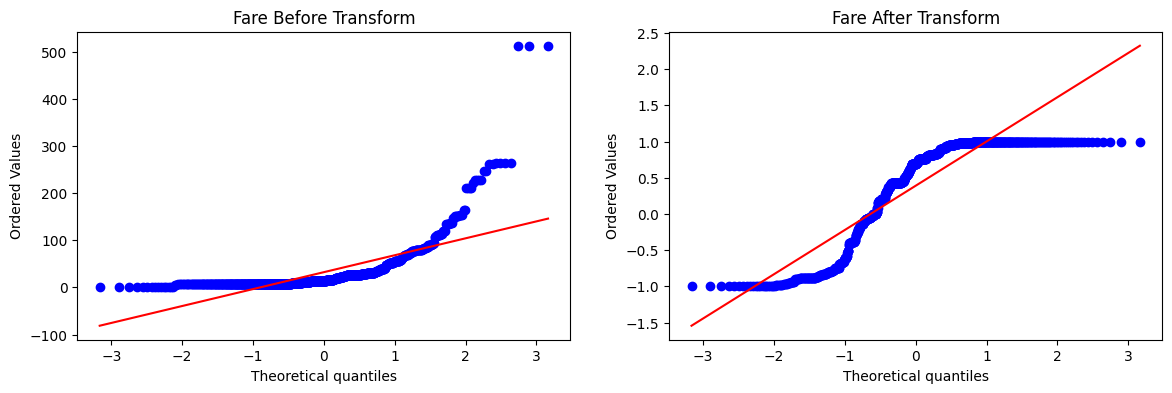

In [84]:
apply_transform(lambda x : np.sin(x))

In [86]:
# log and sq root transform seem good 